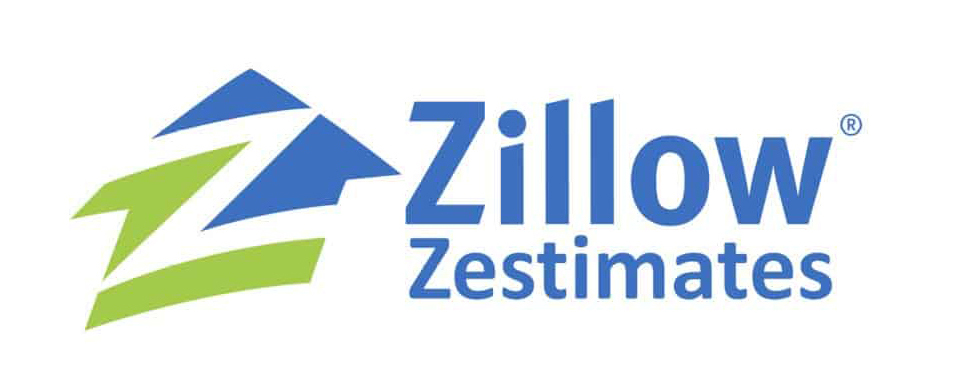

# How Accurate Is Your Zestimates?
by **Meredith Wang** August-9-2022


<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-013243.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-150458.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-2a4d69.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-8DF9C1.svg?logo=matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-65A9A8.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="plotly" src="https://img.shields.io/badge/plotly-adcbe3.svg?logo=plotly&logoColor=white"></a>
<a href="#"><img align="left" alt="sklearn" src="https://img.shields.io/badge/sklearn-4b86b4.svg?logo=scikitlearn&logoColor=white"></a>
<a href="#"><img align="left" alt="SciPy" src="https://img.shields.io/badge/SciPy-1560bd.svg?logo=scipy&logoColor=white"></a>
<a href="#"><img align="left" alt="GeoPandas" src="https://img.shields.io/badge/GeoPandas-1faecf.svg?logo=python-geopandas&logoColor=white"></a>

<h1 align="center">------------ 🏘️ Project Goal ------------</h1>

▪️ Find the key drivers of log error for <span style="color: blue"> **single family properties** </span> in 2017.

▪️ Use clustering methodologies to explore and understand the relationship between features better.

▪️ Construct a Machine Learning Regression model that predict <span style="color: blue"> **log error** </span> of Single Family Properties using attributes of the properties and the useful labels we discovered from clustering.

▪️ Make recommendations on what works or doesn't work in prediction log error.


<h1 align="center">------------ 📝 Initial Questions ------------</h1>

▪️ Are any of the <span style="color: blue">**location features**</span> associated with `logerror`? Is `logerror` significantly different across 3 counties? What about `latitude`, `longtitude`? What about `zip_code`?

▪️ Is the `age` of the house correlated with logerror?

▪️ Are any of the <span style="color: blue">**area (in square feet) features**</span>, including `total_sqft`, `lot_sqft`, `living_sqft`, of the property associated with logerror?

▪️ Are any of the <span style="color: blue">**size features**</span>, including bedrroms, bathrooms, full_bath, roomcnt, of the property associated with logerror?

▪️ Is `transaction_month` correlated with `logerror`?

<h1 align="center">------------ 📚 Data Dictionary ------------</h1>

**Variable** |    **Value**    | **Meaning**
---|---|---
<span style="background-color: #ffe0bd">*Latitude*</span> | Float | Latitude of the middle of the parcel
<span style="background-color: #ffe0bd">*Longitude*</span> | Float | Longitude of the middle of the parcel
<span style="background-color: #ffe0bd">*Zip Code*</span> | Integer | Zip code in which the property is located
<span style="background-color: #ffe0bd">*County*</span> | 1) Ventura 2) Los Angeles 3) Orange | County in which the property is located
<span style="background-color: #ffe0bd">*Bedrooms*</span> | Integer | Number of bedrooms in home 
<span style="background-color: #ffe0bd">*Bathrooms*</span> | Float | Number of bathrooms in home including fractional bathrooms
<span style="background-color: #ffe0bd">*Full Bath*</span> | Interger |  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
<span style="background-color: #ffe0bd">*Room Count*</span> | Float |  Total number of rooms in the principal residence
<span style="background-color: #ffe0bd">*Total Sqft*</span> | Float | Calculated total finished living area of the home
<span style="background-color: #ffe0bd">*Living Sqft*</span> | Float | Finished living area
<span style="background-color: #ffe0bd">*Lot Sqft*</span> | Float | Area of the lot in square feet
<span style="background-color: #ffe0bd">*Assessed Value*</span> | Float | The total tax assessed value of the parcel
<span style="background-color: #ffe0bd">*Structure Value*</span> | Float | The assessed value of the built structure on the parcel
<span style="background-color: #ffe0bd">*Land Value*</span> | Float | The assessed value of the land area of the parcel
<span style="background-color: #ffe0bd">*Tax Amount*</span> | Float | The total property tax assessed for that assessment year
<span style="background-color: #ffe0bd">*Age*</span> | Integer | This indicate the age of the property in 2017, calculated using the year the principal residence was built 
<span style="background-color: #ffe0bd">*Transaction Month*</span> | Integer | The month in 2017 that the property is sold

Note: Full dictionary please reference [zillow_data_dictionary](zillow_data_dictionary.xlsx)

<h1 align="center">------------ 🧮 Wrangle Zillow Data ------------</h1>

## 1. Data Acquisition
▪️ Stored the sensitive data in an **env.py** file in order to get conncetion to the mySQL server and abtain our data.

▪️ To acquire the zillow data for singel family properties, I used the **zillow** database in the mySQL server, and joined the following tables to gather data: <samp>`properties_2017, predictions_2017, propertylandusetype, airconditioningtype, architecturalstyletype, buildingclasstype, heatingorsystemtype, propertylandusetype, storytype, typeconstructiontype`</samp>

▪️ Created **acquire.py** and user-defined function `get_zillow_data()` to acquire and cache data.

In [3]:
# Import essential libraries
from imports import *

# Set up display format
pd.options.display.float_format = '{:,.3f}'.format

# set columnns display format
pd.set_option('display.max_columns', None)

# Calling the function to make the connection to database, run the query, and store the table in the form of a dataframe
messy_df = acquire.get_zillow_data()

# Check the shape of our messy dataframe
messy_df.shape

(52438, 67)

## 2. Missing Values Analysis

<AxesSubplot:>

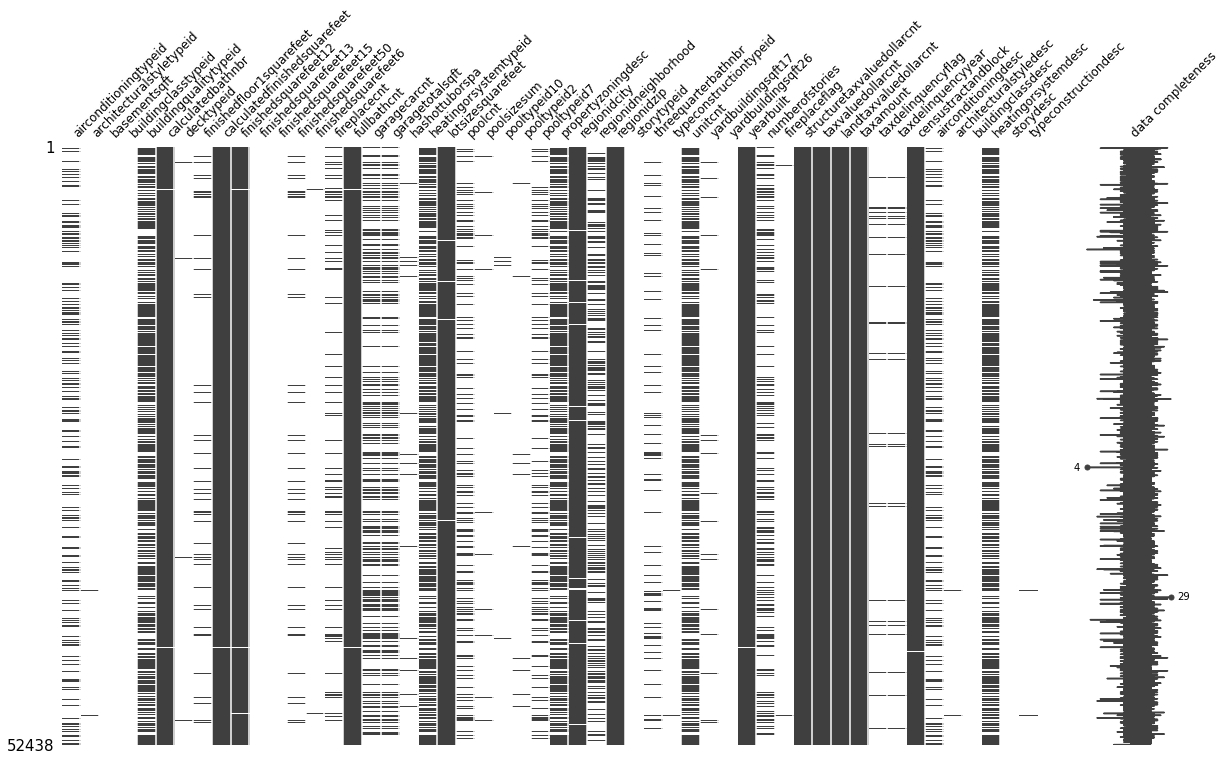

In [5]:
# Visualizing missing values
missingValueColumns = messy_df.columns[messy_df.isnull().any()].tolist()
msno.matrix(messy_df[missingValueColumns], width_ratios = (10, 1), \
           figsize=(20,11), fontsize = 12, sparkline=True, labels = True)

## 3. Data Preparation - Data Cleaning 🧹 
▪️ **Missing Values (NaN):**
- Drop columns and rows that have more than <span style="color: blue">**25% missing data**</span>
    
- All other null values are <span style="color: blue"> **dropped** </span>

- We feel comfortable dropping null values because that's **3.4%** of the entire dataset

▪️ **Rename Columns**
- Ensure all columns have meaningful and short names

▪️ **Data Conversion/Imputation**
- Convert `yearbuil` to `age`

- Convert `taxamount` to `taxrate`

- Extract month from `transaction_date`

- Convert `latitude` and `longitude` to the correct digit

▪️ **Join Tables**
- Join table [address.csv](address.csv) which has the correct zip code for properties (derived from geo engineering)

- Join table [logerror_zip.csv](logerror_zip.csv) which utilized T-test to decide the significancy of logerrors corresponding to each zip code

▪️ **Data Mapping:**
- Created new column `county` corresponding to `fips_code`

- Create new `zip_bin` column with category name corresponding to each `zip_group`

▪️ **Dummy variables**
- Create dummy variables for binary and non-binary categorical variables

- Contatenate dummy variables onto original dataframe


▪️ **Data Types:**
- Column `age`, `zip_code`, `transaction_month` is converted to correct datatype

▪️ **Outliers:**
- Upper bound: <span style="color: blue"> **Q3 + 1.5 * IQR** </span>
- Lower bund: <span style="color: blue"> **Q1 - 1.5 * IQR** </span>
- Each column is adjusted based on distribution

In [6]:
# Cleaning the data using function from prepare.py
df = prepare.prep_zillow(messy_df)

# Checking the shape of our cleaned dataframe
df.shape

(45130, 28)

## 4. Data Preparation - Splitting Data 🗂

In [7]:
# Split the data into train, validate, test using user-defined function from prepare.py
train, validate, test = prepare.split(df)

# Checking the size of each dataset
train.shape, validate.shape, test.shape

((25272, 28), (10832, 28), (9026, 28))

<h1 align="center">------------ 📊 Data Context ------------</h1>